## Partie A: Clustering


In [ ]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Étape 1 : Chargement 

In [ ]:
# Mall_Customers.csv fourni
ds = pd.read_csv("Mall_Customers.csv")
print(ds.head())

### Étape 2 : Nettoyage et traitement

In [ ]:

# Traite les valeurs manquantes le cas échéant, staandardise les variables quantitatives
ds['Gender'] = ds['Gender'].fillna('Female')
ds['Age']=ds['Age'].fillna(18)
ds['Gender']=ds['Gender'].replace({"Male":0,"Female":1})


CustomerID	Gender	Age	Annual Income (k$)	Spending Score (1-100)
    0	      1	     0	  19	    15	        39
    1	      2	     0	  21	    15	        81
    2	      3	     1	  20	    16	         6
    3	      4	     1	  23	    16	        77
    4	      5	     1	  31	    17	        40

### Étape 3 : Analyse univariée / multivariée

In [ ]:

# Histogramme de Chaque Variables
ds.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()



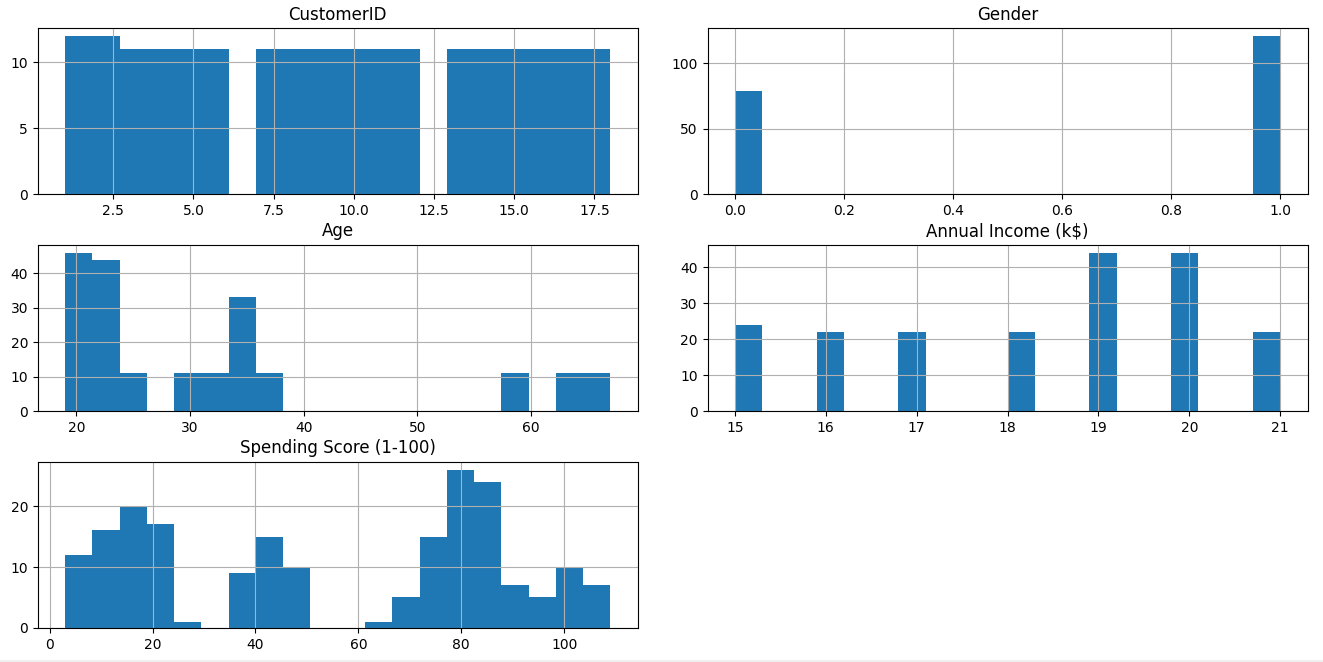

In [ ]:
# BoxLayout de Chaque Variables
ds.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

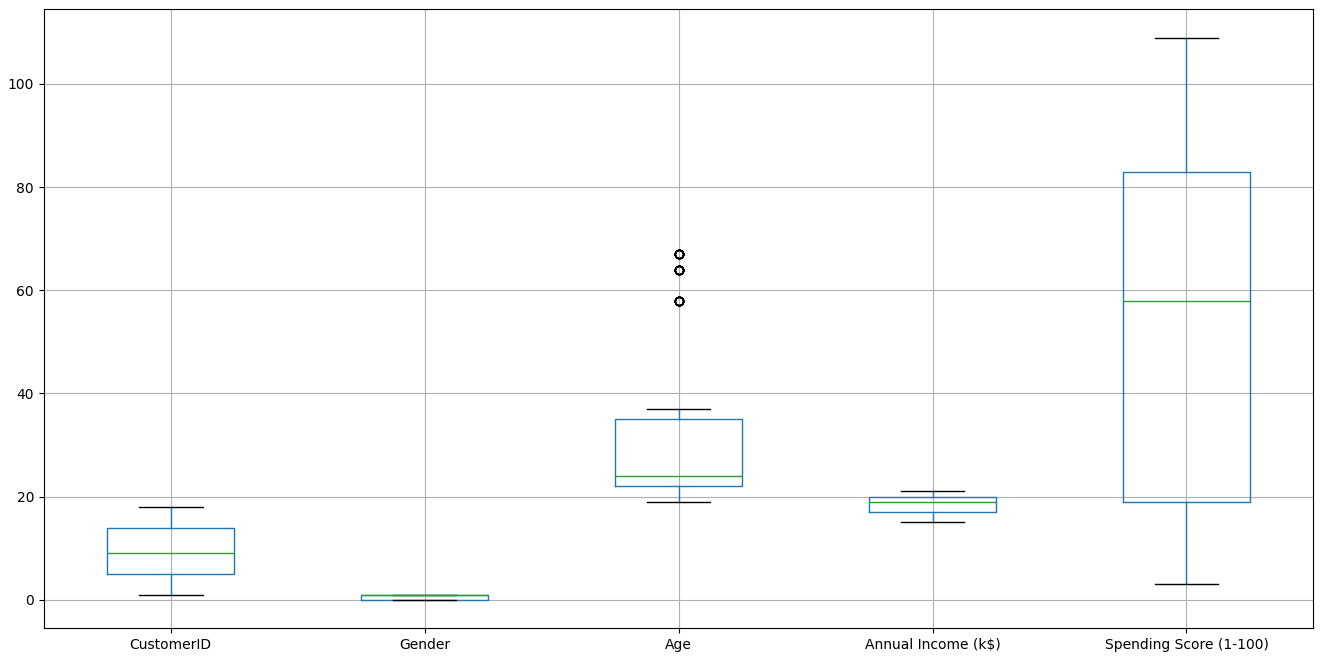

In [ ]:
# Matrice de Correlation
print("La matrice de Correlation :")
print(ds.corr())

                        CustomerID   Gender     Age      Annual Income (k$)  Spending Score (1-100)   
CustomerID                1.000000 -0.099512  0.258946        0.977104              0.027239   
Gender                   -0.099512  1.000000 -0.157067        -0.017716             0.171020   
Age                       0.258946 -0.157067  1.000000        0.381425              -0.586731   
Annual Income (k$)        0.977104 -0.017716  0.381425        1.000000              -0.079034   
Spending Score (1-100)    0.027239  0.171020 -0.586731        -0.079034             1.000000   

In [ ]:
# Scatter Plot
sns.pairplot(ds)
plt.show()

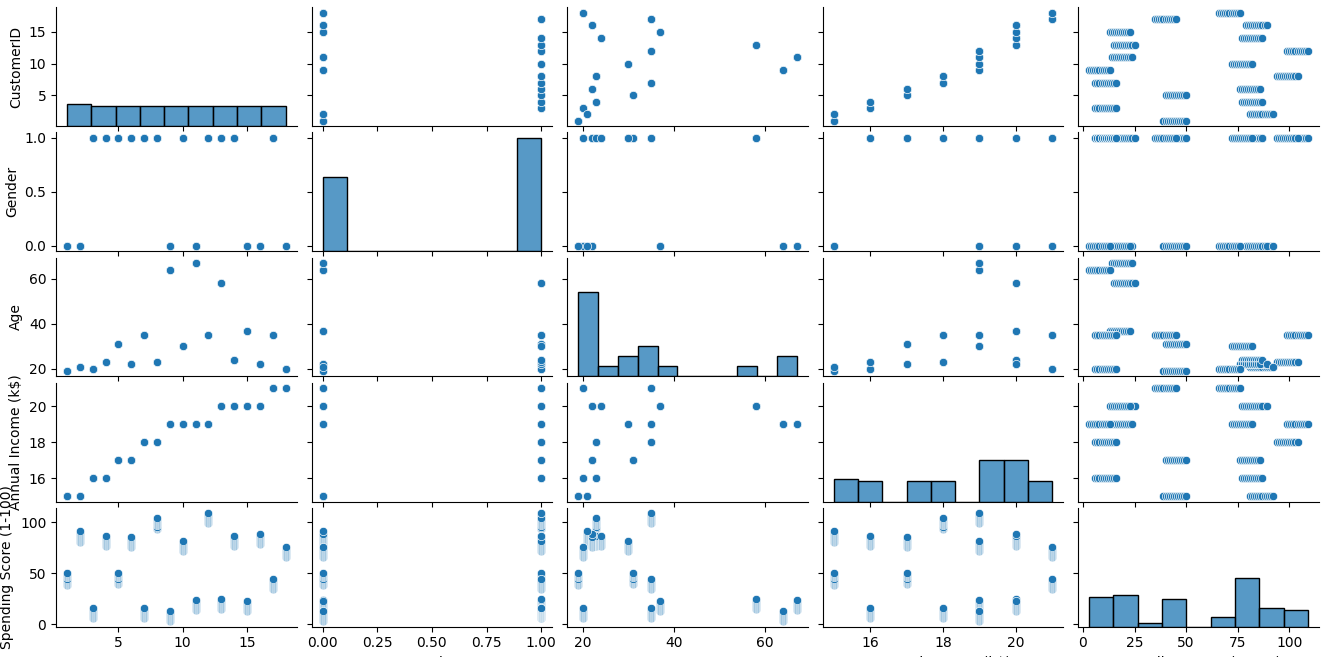

### Étape 4 : future ingineering et selection

In [ ]:
# Supprimez les features non-informatives ou redondantes. Créer des ratios ou catégorisez des variables.
ds_select=ds.drop('CustomerID', axis=1)

	Gender	Age	Annual Income (k$)	Spending Score (1-100)
    0	     0	  19	    15	            39
    1	     0	  21	    15	            81
    2	     1	  20	    16	             6
    3	     1	  23	    16	            77
    4	     1	  31	    17	            40

### Étape 5 : Réduction de dimension

In [ ]:
# Appliquez une PCA pour visualiser les données en 2D.
X=ds_select.drop("Spending Score (1-100)",axis=1) 
Y=ds_select["Spending Score (1-100)"]
# PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
df_pca=pd.DataFrame(data=X_pca,columns=['component1','component2'])
df_pca.head()

    component1	 component2
0	-45.374976	-20.266595
1	-45.393362	-18.266684
2	-44.385275	-19.259655
3	-44.412854	-16.259789
4	-43.486439	-8.250956

### Étape 6 : Ajout des clusters

In [ ]:
# Variables pour Stocker les Resultats
inertias = []
silhouettes = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
print("Inerties ( méthode Elbow):",inertias)
print("Silhouette scores:",silhouettes)


In [ ]:
Elbow:[388.0539844234633,254.15791428624635,171.21750111591155,72.91785846918819,46.14578393090932]
Silhouette:[0.35433851416384043,0.44031897332720504,0.5288219118426783,0.6348732936527017,0.6685630518308578]

In [ ]:
# Affichage Elbow et Silhouette
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.title('Méthode Elbow')
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, 'ro-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette')
plt.tight_layout()
plt.show()

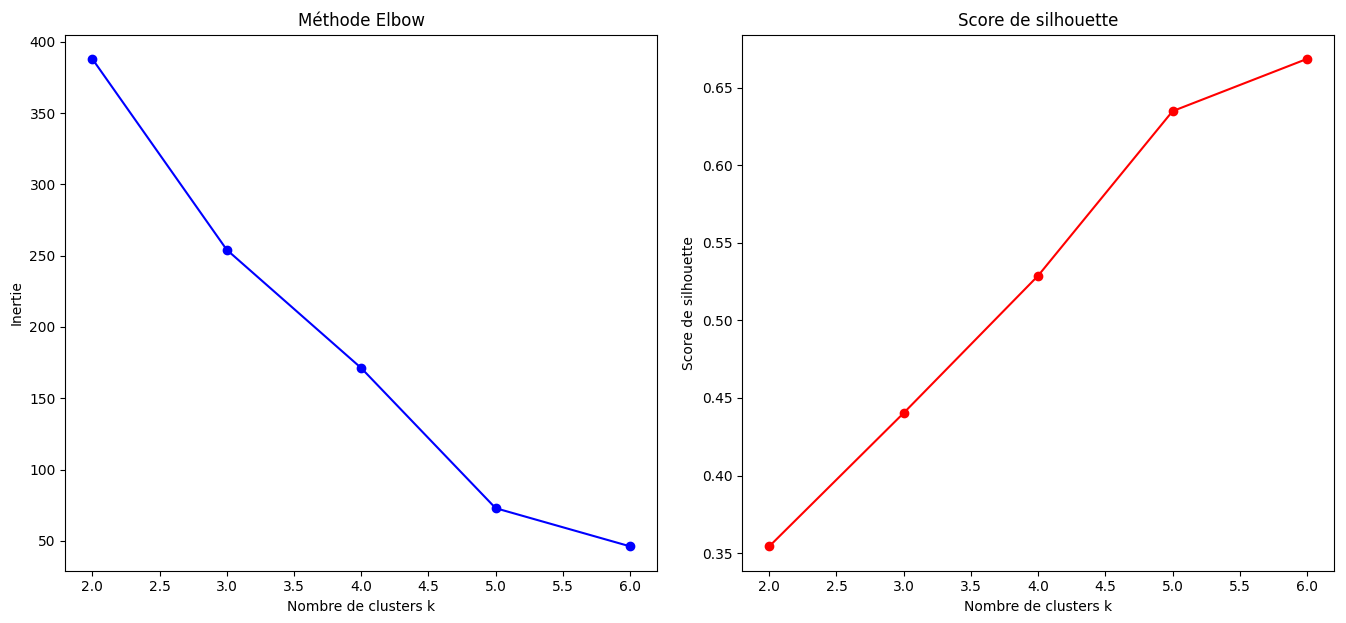

### Étape 7 : Visualisation des clusters

In [ ]:
# Anayses Des Centroides et Visualisation 2D Coloré par Cluster
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
labels_final = kmeans_final.fit_predict(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_final , cmap='viridis', alpha=0.7)
plt.title('Visualisation des clusters (PCA)')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.tight_layout()
plt.show()

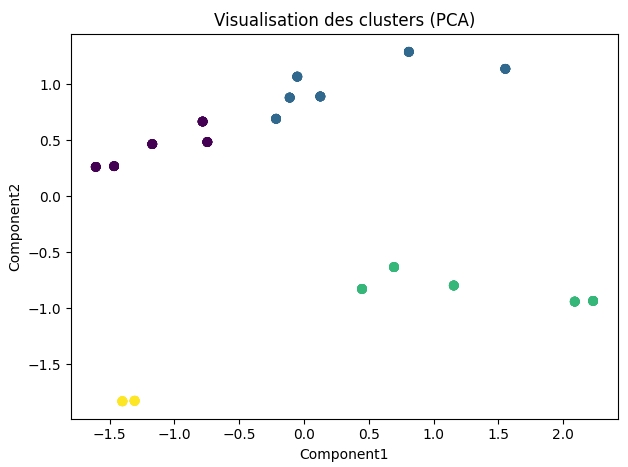

### Etape 8 : Conclusion

**Pertinence des clusters obtenus:**\
L'analyse de segmentation client réalisée à partir du jeu de données Mall_Customers.csv a permis d'identifier plusieurs groupes homogènes à l'aide de l'algorithme de clustering K-means.
Le choix du nombre optimal de clusters a été guidé par deux critères :
- La méthode Elbow (analyse de l'inertie)
- Le score de silhouette, qui mesure la cohésion interne des groupes
Les résultats montrent une séparation relativement claire entre les groupes de clients, en fonction :
- de leur âge
- de leur revenu annuel
- et de leur score de dépense
L'utilisation de la PCA (réduction de dimensions) a permis une visualisation efficace des clusters en 2D.  

**Suggestions d'améliorations**:\
Sur les données:
- Ajouter des variables comme: profession, statut marital, fréquence d’achat
- Nettoyer et uniformiser les libellés (spending Score, majuscules, etc.)

**Conclusion générale:**\
L’analyse de clustering réalisée offre une base solide pour une segmentation client. Elle permet de mieux adapter les stratégies marketing, proposer des offres ciblées, et fidéliser les segments les plus rentables. Une collecte de données plus riche permettrait d’affiner davantage cette segmentation et d’enrichir la compréhension du comportement client.
